In [2]:
import numpy as np
import cv2 as cv
from OpenGL.GL import *
from OpenGL.GLU import * 
from OpenGL.GLUT import *
import matplotlib.pyplot as plt
from beamngpy import BeamNGpy, Scenario, Vehicle
from beamngpy.sensors import Camera, Lidar

In [27]:
client = BeamNGpy("localhost", 64256, home="D:\Downloads\BeamNG tech v0 24 0 2\BeamNG.drive-0.24.0.2.13392")
client.open(launch=True, deploy=True)

In [28]:
scenario = Scenario("west_coast_usa", "road_map_example")
orig = (568.908386, 13.4217358,  148.56546)

vehicle = Vehicle("ego_vehicle", model="etk800", license="PYTHON")
camera = Camera(pos=orig, direction=(0, 1, 0), fov=70, resolution=(512, 512), colour=True)
vehicle.attach_sensor("camera", camera)
scenario.add_vehicle(vehicle, pos=orig)
scenario.make(client)

In [29]:
client.load_scenario(scenario)
client.start_scenario()
client.pause()

In [35]:
client.resume()

{'up': [-0.035582318902015686, -0.030439741909503937, 0.9989030361175537], 'dir': [0.7045608758926392, 0.7081132531166077, 0.0465802326798439], 'vel': [0.07682988047599792, 0.081805020570755, 0.02878856472671032], 'pos': [712.4215087890625, 27.155956268310547, 156.0720672607422], 'rotation': [-0.010390878655016422, -0.02091379277408123, 0.9241378307342529, -0.3813449740409851], 'front': [713.23046875, 28.43935775756836, 156.73373413085938]}


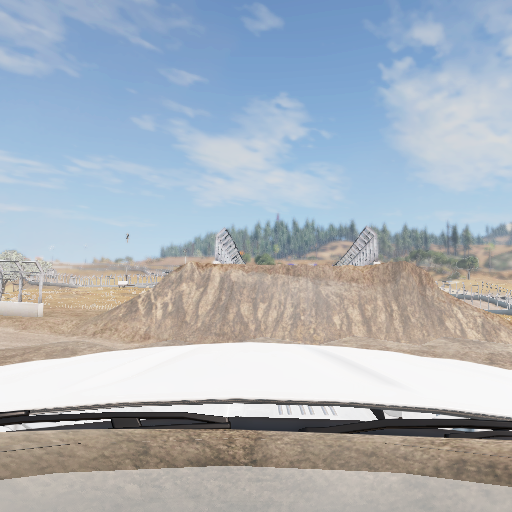

In [62]:
camera.pos = (-0.3, 0.2, 1)
image = client.poll_sensors(vehicle)
print(image["state"])
display(image["camera"]["colour"])

In [62]:
# print(dir(vehicle.sensors["camera"].colour))
# image = client.poll_sensors(vehicle)["camera"]["colour"]
image = vehicle.sensors["camera"].colour

for sensor in vehicle.poll_sensors():
    print(sensor)
# plt.imshow(np.asarray(vehicle.sensors["camera"].colour))

# print(client.poll_sensors(vehicle)["lidar"])


state
